# **Report**

# Abstract

# Introduction

## Motivation

The goal of this project is to explore the interplay of learned strategies and deterministic strategies within a gameplay environment. On a macro level, we want to explore the effectiveness of agents that "learn" a strategy through utilizing some reinforcement learning algorithm, and that of an agent programmed to carry out a set strategy. We also want to explore hyper-parameter optimization through the utilization of genetic algorithms. We also want to explore the effectiveness of strategic agents in playing highly undeterministic environments.

##  Why Uno?

Uno was chosen as the game through which we explored this problem because it is simple to implement a strategy agent for, it's limited diversity of card types simplifies Q-Learning agent implementations, and its relatively non-deterministic nature. The fairly large component of chance in the determination of the outcome of the game allows us to better exploree the interplay of the deterministic agents and non-deterministic game and agents. Furthermore, compared to more complex card games like poker, the simple nature of Uno limits the state space for Q-Learning based agents. This project was also inspired by an exercise that was given in a high school computer science class. The goal of this exercise was for each student to design an agent to play Uno. An agent implemented by a member of this group implemented the agent in such a way that each card in hand was assigned a score based on how strategic each card in the hand of the agent would be to play. It considered the number of cards in other players hands, how many cards of each color had already been played, how many cards of each color were in hand when calculating this score. However, the weighting of each of those categories was somewhat arbitrary, being decided by the intuition of a 16 year old. This strategy was good enough, however, to get second place when played against other agents designed by other people in this class in a simulation of 100,000 games. Our intention is to design a similar deterministic agent with slightly better agent design, and similarly arbitrary weighting, and use a genetic algorithm to optimize these weights. Thir prior knowledge of the game, and designing agents for the game also weighed into this decision.

## Learned Strategy vs. Deterministic Strategy

With this project, we really want to explore learned strategies and deterministic strategies and how they are suited to the needs of a specific problem. Learned strategies are a more truly A.I. approach to the problem, as it allows the machine itself to produce logical structures in response to its environment. Deterministic strategies utilize the developer's own intelligence to produce logical structures. In trying to synthesize the two, we have designed a deterministic agent with hyper-parameters that can be intelligently trained. We wll test the performance of the deterministic agents before and after training, and then we will compare it with the performance of the Q-Learning agents. We will also train one of the Q-Learning agents against our deterministic agent, in order to see if wee can introduce domain knowledge to the model this way. We expect our optimized strategic agent to perform the best, followed by the Q-Learning agent trained against our (unoptimized) strategic agent, followed by our unoptimized strategic agent, followed by the Q-Learning agent trained against a random strategy. We expect our deterministic agents to have an inherent advantage in that they can store more domain knowledge. The contraints of a managable Q-Table means that not all game states can be represented, leading to the decision by Pfann to restrict domain knowledge to a maximum to two cards of each color/value per hand.

## Takeaways

We were surprised to find out over the course of this experiment that even our optimized strategic agent was only able to match the performance of the Q-Learning agents. While both our optimized and unoptimized strategic agents won a majority of their games against an agent utilizing a random strategy, our unoptimized agent lost against both of our Q-Learning agents, and our optimized strategic agent was only able to match the efficacy of our Q-Learning agent. We also found that training our Q-Learning agent against our strategic agent had little to no effect on its performance against any agent. We thus conclude that a combination of Uno's game characteristics (namely its incoroporation of chance), along with the effectiveness of Q-Learning makes this process of manually inserting domain knowledge into intelligent models. 

# Background & Related Work

## Background:

## Related Work:

Though there are a few key examples, not much work has been documented in studying the effectiveness of Genetic Algorithms in hyper-parameter optimization of deterministic game agents.

Much of the work we’ve encountered has either been developed over different card games or has used Reinforcement Learning with little to no use of Genetic Algorithms to optimize the neural network. One such article, by Bernhard Pfann, contains a working implementation of the Uno card game in Python, as well as an AI that utilizes reinforcement learning (RL) to inform its decisions. (Pfann) The game implementation contains all the necessary properties required by our AI, including accessible color and value properties for each card, as well as each card in the player’s hand and all the cards in the deck. This article also provides metrics on the nature of Uno itself, including the +4% win-rate bias towards the player who goes first. (Pfann) This will help inform us in planning out our AI’s high-level strategy, which will allow us to more easily implement it into code in the future.

The recurring decision to use neural networks in prior work is due to the need to train models on numerous complex states that can be reached by each card played from the deck of cards in most card games, all instantiations of which a real player would potentially consider. (Niklaus et al.) In a paper surveying the use of AI for card games, the authors emphasize the importance of using “information sets” containing all possible card combinations opponents could have for imperfect information games (IIGs) such as Poker. (Niklaus et al.) While not explicitly mentioned, this recommendation could be extended to Uno, as it is also an imperfect information card game that benefits from such “information sets”. Additionally, this survey suggests trying to get the AI to achieve Nash Equilibrium, an effectively deterministic state in a game where the non-losable action-space for both players narrows down to a single move each turn.

Most of these models do not achieve an optimal model but rather a possible best fit model for a simulation  based on the design choices implemented by the neural network and genetic algorithms. Some research has shown that using genetic algorithms to optimize hyper parameters does yield a significant improvement in the accuracy and efficiency of the neural network after being trained. (Xiang and Zhining; Bergstra et al.) It should be noted that in both of these studies, the application of the genetic algorithms were for optimizing the hyperparameters needed for an image classification model, rather than for a card game like Uno. However, since we are only seeking to use the genetic algorithm to optimize the preference weights for each strategy variable, the implementations should carry over with little modification.

One of the papers in question mentions modifications to the standard genetic algorithm specifically for the purposes of optimizing parameters for a neural network. A paper by Xiang and Zhining suggests implementing a new method known as truncation selection, where a set percentage of “excellent” chromosomes are selected and crossbred/mutated evenly and randomly as a means to supplement the more traditional roulette selection mechanism. (Xiang and Zhining)

We hope to replicate or improve on this knowledge using our own project design.


# Problem

This will be achieved by designing an intelligent agent to play the popular card game Uno. By using a deterministic agent with optimizable hyper-parameters, we want to explore the interplay between deterministic algorithms and non-deterministic environments. Furthermore, we want to explore how deterministic agents can be used to better train rl-based agents, and how rl-based agents can be used to provide selective pressure for finding optimal deterministic agents. In order to acheive this, we will need to design a strategic agent that still leaves some room for optimization, a genetic algorithm that promotes both genetic diversity and still has a tendency towards consensus, a reinforcement learning based agent, and a uno game environment.

# Solution

We forked the implementation of the Uno game that was developed by Bernhard Pfann, since it provides a ready-made implementation of Uno in Python, as well as being compatible with his reinforcement learning based agent with which we want to compare to our agent before and after hyperparameter optimization. We designed our own deterministic user agent based on the design of the one mentioned in the background section. We did not directly copy the code, however the general concept of “scoring” cards based on the aforementioned categories was preserved.

Our strategic model works by rating cards according to the formula: *score = (C_1 * x * a) + (C_2 * y * b)*, where *x* is the number of cards in hand with same color as the card in question, *y* the number of cards in hand with same value as the card in question, *a* the number of cards seen with same color as the card in question, *b* the number of cards seen with same value as the card in question, and *C_1, C_2* are hyperparameters capturing the importance of these components. In addition to this base score, special cards also receive a bonus. This bonus is calculated according to this formula: *bonus = l + r\*n*, where *l* is a hyper-parameter capturing the inherent value of a given special card relative to other cards, *r* is a hyper-parameter capturing the when in the game it is most advantagious to play the card, and *n* is how many cards have been played in the game so far. This allows us to both hardcode a strategy and allow room for optimization. 

The weights given to the strategy-influencing categories are initiated all to one, however, we then adapted a parameter-optimizing genetic algorithm to adjust these weights. The genes in each chromosome represent a hyperparamter list of floating point numbers (*C_1, C_2*). There are 12 such hyperparameters in total. The first two control the importance of playing cards with either colors or values that are abundent in the hand and scarce in the deck. The last ten are hyperparameters that control the behaviour of the agent in regards to special cards, since there are 5 types of special card, 10 hyperparameters in total. Each special card gets two hyperparameters because the first one captures the inherent value of the special card when compared with other cards, and the second helps the agent decide when to play the special cards to maximize thier advantage. (*r,l*)

Our genetic algorithm uses a creative design in the spirit of Xiang and Zhining. We modeled the hyper-parameter optimization problem as a search problem, therefore we knew that the ideal genetic algorithm would maintain high genetic diversity while developing a consensus. Furthermore, since each uno tournament itself is fairly time-intesive to run, and since we weren't able to get multi-threading to work, we had to come up with an efficient implementation of a genetic algorithm. The algorithm's tendency towards consensus is generated through the use of a high pass-thru rate about 15%. (This means that the top 15% of individuals in the population will survive to the next generation). This means that consistent high performers carry over from generation to generation. Instead of implementing mutations directly, when individuals reporduce, the child's genetics are determined by randomly selecting parameter values from a normal distribution centered at the mean of the two parent's parameters. This element of randomness repicates the chaos of random genetic mutation. To augment this process, the standard deviation for the normal distribution is given by the formula: for p = |param - mean|:  p/{mutation coefficient}. This means that as parents become more genetically similar (and consensus is being reached) offspring will have greater genetic diversity. This, in combination with the aforementioned high pass-thru rate allow for a good balance of genetic diversity and tendency towards consensus, which should allow us to accurately sample a greater radius of the search area. This model was inspired by the concept of "punctuated equillibrium" from evolutionary biology. 

We have mostly preserved the Q-Learning Agent designed and implemented by Pfann, however we have changed a few things to make it more effective and practical for our application. First, we modified his game implementation so that it could play any two agents against each other, as it was initially hardcoded to play one agent agaisnt a random strategy agent. Then we got rid of the Monte Carlo based learning agent, as we felt that it added to much extra complexity to our experimental designs, and was worse performing than the Q-Learning agent. Lastly, and most importantly, we modified the Q-Learning agent to use the bellman equation, since it used a bellman approximation function instead.


# Outcomes and Evaluations

In order to evaluate the outcomes of each of our intelligent agents, we played them in an Uno tournament consisting of 1000 games against each other and random strategy agents. Agents were then evaluated on the percentage of games won in this tournament.

## Libraries/Setup
***

In [1]:
# Ensure that all requisite public libraries are installed
import sys, os
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Custom libraries
import environment as uno
import q_learning_agent as rlagent
import strategy_agent as sagent
import notebook_helper as nb

# Public libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [2]:
models_loc = os.path.abspath("../assets/models/")
print(models_loc)

/Users/siddharthamodur/Documents/Fourth Year/Fall/CSCI 364/Final Group Project/uno-genetic-rl-agent/assets/models


## Performance of Q-Learning Agents Trained Against a Random Strategy
***

### Performance When Played Against Random Strategy
***

In [5]:
# Agent parameters
agent_info = {"epsilon"  : .1,
              "gamma": .2,
              "alpha": 0, #decay
              "model": "../assets/models/q_v_rand/model",
              "learn": False
              }

# Load Q-Learning agent
q_v_rand = rlagent.QLearningAgent(agent_info)

# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = q_v_rand,
                     agent2 = None, #random strategy agent
                     comment = False)


winners, turns, time = run

#### Win Rate

In [6]:
nb.getWinRate("q-learning", winners)

0.545

q-learning    545
Random        455
Name: Winner, dtype: int64

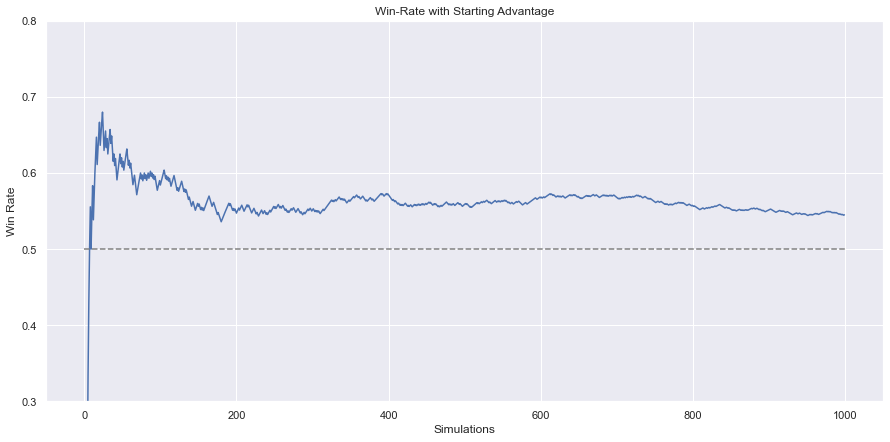

In [7]:
result, plot = nb.getResult("q-learning", winners, turns)
result["Winner"][-10000:].value_counts()

Our Q-Learning model, when trained against a random strategy player, beats random strategy players about 55% of the time. This means that the Q-Learning model gives its player more of an advantage than being the starting player, who wins 54% of the time on average (when using the same strategy).

### Performance When Played Against Unoptimized Strategic Agent
***

In [9]:
# Load Strategic Agent
strat_unopt = sagent.StrategicAgent({"model": "../assets/models/strat_unopt/model", "parameters": None})

# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_unopt,
                     agent2 = q_v_rand, 
                     comment = False)


winners, turns, time = run

#### Win Rate

In [10]:
nb.getWinRate("q-learning", winners)

0.52

q-learning    520
strategic     480
Name: Winner, dtype: int64

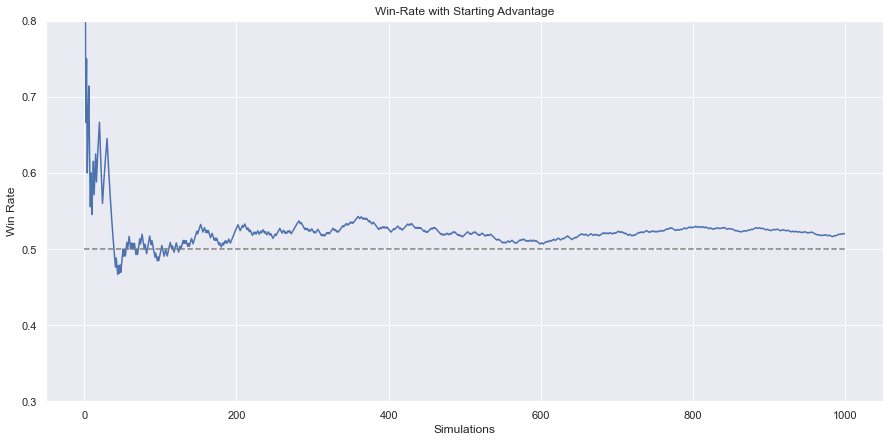

In [11]:
result, plot = nb.getResult("q-learning", winners, turns)
result["Winner"][-10000:].value_counts()

Our Q-Learning model, when trained against a random strategy player, beats our deterministic strategy agent about 52% of the time. This means that our strategic agent is slightly more effective against this Q-Learning model than a random strategy agent, but is still inferior to our Q-Learning model. This suggests that a Q-Learning model, even when trained against a random strategy agent, is still superior to our unoptimized strategy agent.

## Performance of Q-Learning Agents Trained Against an Unoptimized Strategy Agent
***

### Performance When Played Against Random Strategy
***

In [15]:
# Agent parameters
agent_info = {"epsilon"  : .1,
              "gamma": .2,
              "alpha": 0, #decay
              "model": "../assets/models/q_v_strat/model",
              "learn": False
              }

# Load Q-Learning agent
q_v_strat = rlagent.QLearningAgent(agent_info)

# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = q_v_strat,
                     agent2 = None, #random strategy agent
                     comment = False)


winners, turns, time = run

#### Win Rate

In [16]:
nb.getWinRate("q-learning", winners)

0.539

q-learning    539
Random        461
Name: Winner, dtype: int64

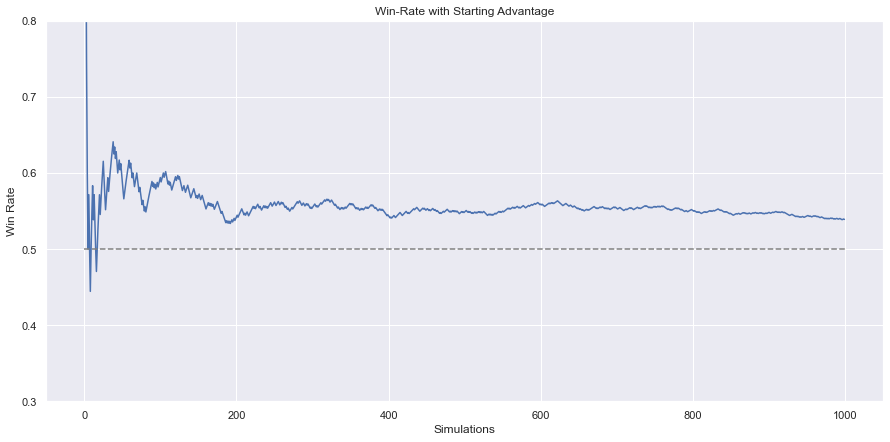

In [17]:
result, plot = nb.getResult("q-learning", winners, turns)
result["Winner"][-10000:].value_counts()

Our Q-Learning model, when trained against a random strategy player, beats our random agent about 54% of the time. This means that the Q-Learning model gives its player a comparable advantage to being the starting player, who wins 54% of the time on average (when using the same strategy). This is actually a lower win rate than the Q-Learning agent trained against the random agent. When played against a random strategy agent, there seems to be no advantage provided by training the Q-Learning agent against an unoptimized strategic agent. 

### Performance When Played Against Unoptimized Strategic Agent
***

In [18]:
# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_unopt,
                     agent2 = q_v_strat, 
                     comment = False)

winners, turns, time = run

#### Win Rate

In [19]:
nb.getWinRate("q-learning", winners)

0.523

q-learning    523
strategic     477
Name: Winner, dtype: int64

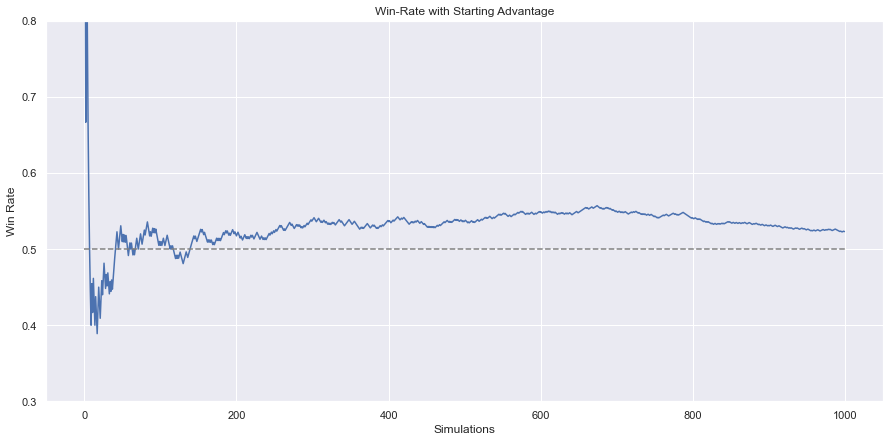

In [20]:
result, plot = nb.getResult("q-learning", winners, turns)
result["Winner"][-10000:].value_counts()

Our Q-Learning model, when trained against a random strategy player, beats our deterministic strategy agent about 52% of the time. This means that our (unoptimized) strategic agent is slightly more effective against this Q-Learning model than a random strategy agent, but is still inferior to our Q-Learning model. Most curiously, this win rate is very comparable to the win rate of a Q-Learning model trained against a random agent when played against our unoptimized strategy agent. This, in combination with it's comparable performance against a random agent, suggests there is little advantage to training the Q-Learning agent against our strategic agent. To know this for sure however, we shall play our two Q-Learning models against each other. 

### Performance When Played Against a Q-Learning Agent Trained Against a Random Strategy
***

In [26]:
q_v_rand.name = "q_v_rand"
q_v_strat.name = "q_v_strat"

# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = q_v_rand,
                     agent2 = q_v_strat, 
                     comment = False)

winners, turns, time = run

#### Win Rate

In [27]:
nb.getWinRate("q_v_strat", winners)

0.493

q_v_rand     507
q_v_strat    493
Name: Winner, dtype: int64

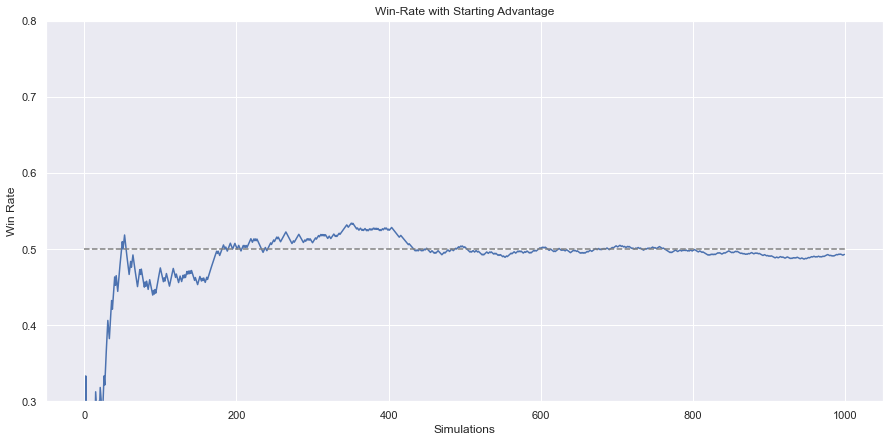

In [28]:
result, plot = nb.getResult("q_v_strat", winners, turns)
result["Winner"][-10000:].value_counts()

These results are about what we expected, as the win rate is close enough to 50% to conclude that there is no significant advantage to training a Q-Learning agent against our deterministic agent.

## Performance of an Unoptimized Strategy Agent Against a Random Strategy
***

In [29]:
# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_unopt,
                     agent2 = None, #random strategy agent
                     comment = False)


winners, turns, time = run

#### Win Rate

In [30]:
nb.getWinRate("strategic", winners)

0.552

strategic    552
Random       448
Name: Winner, dtype: int64

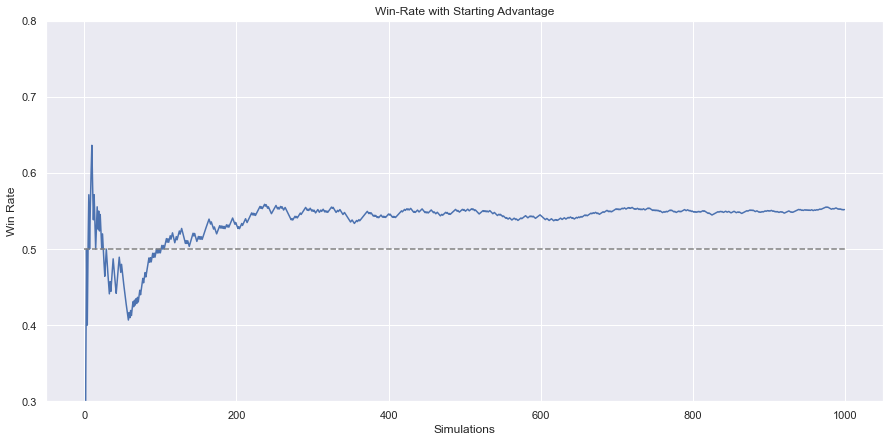

In [32]:
result, plot = nb.getResult("strategic", winners, turns)
result["Winner"][-10000:].value_counts()

Our unoptimized deterministic strategy agent had a 55% win rate against a random strategy agent. This is roughly equivalent to both our Q-Learning models. This suggests that although there is no advantage to training our Q-Learning models against our deterministic agent, our unoptimized deterministic agent is still equally effective at beating a random strategy as our Q-Learning models.

## Performance of the Optimized Strategy Agent Trained Against a Random Strategy
***

### Comparison of Hyper-parameters Before and After Genetic Algorithm

In [36]:
# Load optimized strategic agent
agent_info = {
    "model": "../assets/models/strat_opt_rand/model",
    "parameters": None
}

strat_opt_rand = sagent.StrategicAgent(agent_info)

strat_unopt.name = "strat_unopt"
strat_opt_rand.name = "strat_opt"

In [37]:
 """
 There are 12 hyperparameters, listed by index:

    #0 The relative importance of the number of cards in hand with a certain color
    and the number of cards seen so far with that color.
    #1 The relative importance of the number of cards in hand with a certain value
    and the number of cards seen so far with that value.
    #2,3 hyperparameters for skip cards (see solution section)
    #4,5 hyperparameters for reverse cards (see solution section)
    #6,7 hyperparameters for +2 cards (see solution section)
    #8,9 hyperparameters for +4 wild cards (see solution section)
    #10,11 hyperparameters for normal wild cards (see solution section)
"""

print(strat_unopt.h)
print(strat_opt_rand.h)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1.7424438470419371e+199, 1.168070183028209e+199, -2.1729739178511148e+199, 4.626401723877123e+197, 6.12409447650191e+200, 4.501738286226367e+198, -2.9573141041547618e+200, 6.758259109378554e+202, -1.5020316180793797e+197, -5.4045329464997045e+197, 2.515549532504289e+201, -6.806716797142016e+201]


Note that the hyper-parameter array found by the genetic algorithm is radically different from the one from our unoptimized agent.

### Performance When Played Against Random Strategy
***

In [42]:
# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_opt_rand,
                     agent2 = None, #random strategy agent
                     comment = False)


winners, turns, time = run

#### Win Rate

In [43]:
nb.getWinRate("strat_opt", winners)

0.557

strat_opt    557
Random       443
Name: Winner, dtype: int64

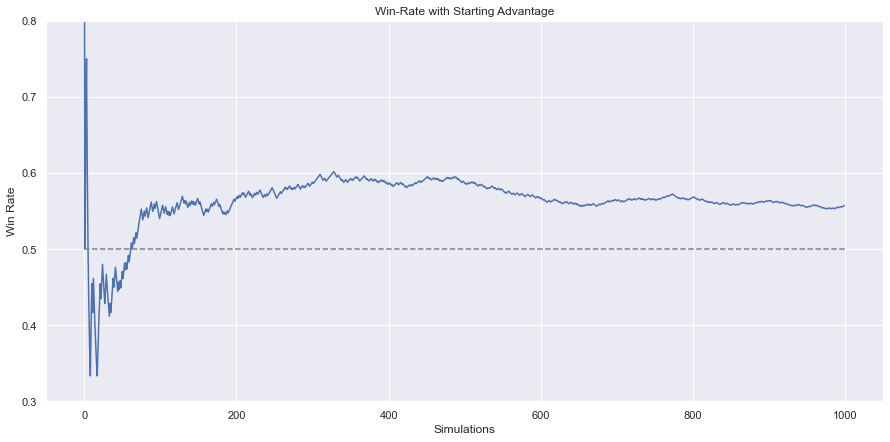

In [45]:
result, plot = nb.getResult("strat_opt", winners, turns)
result["Winner"][-10000:].value_counts()

Our optimized strategy agent outperformed both our Q-Learning models, as well as our unoptimized strategy agent, when playing against a random strategy. However, to conclude whether or not hyper-parameter optimization is effective, we need to test our optimized agent against our unoptimized agent.

### Performance When Played Against Unoptimized Strategic Agent
***

In [46]:
# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_unopt,
                     agent2 = strat_opt_rand, 
                     comment = False)

winners, turns, time = run

#### Win Rate

In [47]:
nb.getWinRate("strat_opt", winners)

0.555

strat_opt      555
strat_unopt    445
Name: Winner, dtype: int64

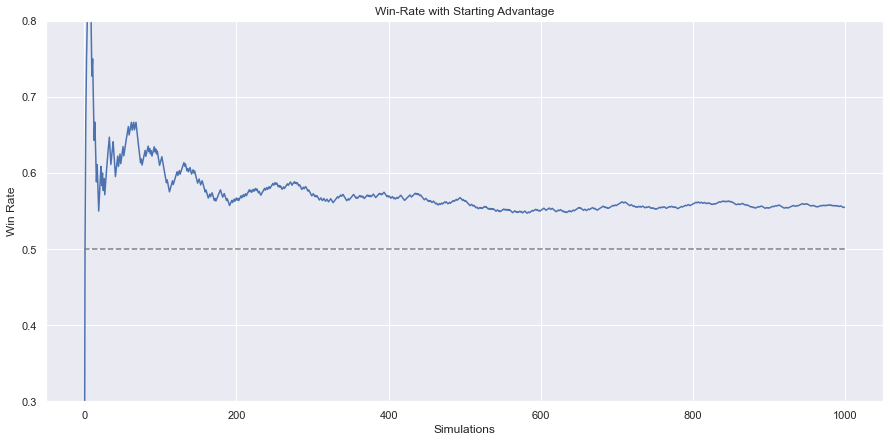

In [48]:
result, plot = nb.getResult("strat_opt", winners, turns)
result["Winner"][-10000:].value_counts()

Our optimized strategy agent significantly outperformed our unoptimized strategic agent, which, in combination with its slightly better performance against the random strategy agent, suggests that genetic algorithms are effective for hyper-parameter optimization. However, it still remains to be seen if our optimized strategic agent can beat our Q-Learning model head on. 

### Performance When Played Against a Q-Learning Agent
***

In order to do this, we will use the Q-Learning model that we trained against our unoptimized strategic agent, which will give the Q-Learning agent the best chance. 

In [58]:
# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = strat_opt_rand,
                     agent2 = q_v_strat, 
                     comment = False)

winners, turns, time = run

#### Win Rate

In [59]:
nb.getWinRate("strat_opt", winners)

0.504

strat_opt    504
q_v_strat    496
Name: Winner, dtype: int64

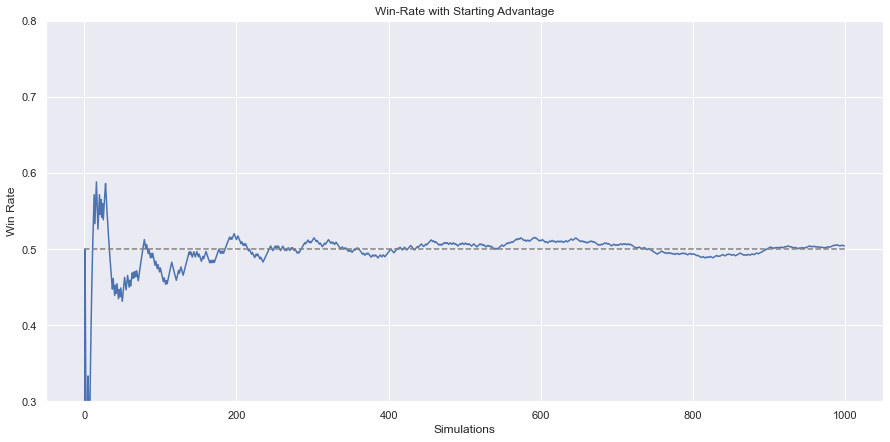

In [60]:
result, plot = nb.getResult("strat_opt", winners, turns)
result["Winner"][-10000:].value_counts()

The results of this experiment show that the performance of the optimized strategic agent is about equivalent to the Q-Learning Model.

Overall, we feel that these results are representative of the effectiveness of these different A.I. techniques in playing Uno. However, time contraints did not allow us to train our models for as long as we would have liked. We were only able to run 500 generations of 500 individuals for our genetic algorithm, and we were only able to run 100,000 games to train our Q-Learning agent. Since the Q-Table captures 272,000 states. Given the effectiveness of the models however, we do not feel that this lack of training time would impact the evaluation of the trends studied here.

# Conclusion

While both our optimized and unoptimized strategic agents won a majority of their games against an agent utilizing a random strategy, our unoptimized agent lost against both of our Q-Learning agents, and our optimized strategic agent was only able to match the efficacy of our Q-Learning agent. We also found that training our Q-Learning agent against our strategic agent had little to no effect on its performance against any agent. This suggests that providing domain knowledge to an Uno playing agent by hardcoding strategic knowledge into the agent itself does not offer significant performance improvements. It should be noted however, that Uno tournaments run with our strategic agent ran in a fifth of the time those with the Q-Learning agent, while offering a similar advantage in win rate. Optimizing the strategic agent took about as much time as training the Q-Learning agents, but once trained, ran much quicker. 

The fact that hardcoded strategy provided no perfromance benefit is probably due to both the structure of the Uno game itself, and the efficacy of Q-Learning for this application. The fact that there is a large element of chance in the determination of the outcome of an Uno game means that the actual decisions made by the agents have a smaller impact on the outcome of the game. Uno is also a relatively simple game, which means that the state space is relatively small, and thus is a good application for Q-Learning model. The truncation of the state space by the design of the Q-Learning agent did not seem to affect its performance, which further suggests that full information is not needed to make good decisions in Uno. We still feel like hybrid approaches using hardcoded strategies alongside A.I. techniques still have the potential to offer performance benefits for more complex and deterministic games/applications.

Further work in this area should focus on this area, maybe using this approach to build a poker playing agent. It would also be interesting to see the Uno player problem be tackled using nueral networks, and whether training them against strategic agents could reduce training time or increase efficacy. 